# Binary Image Classifier | Angry-Neutral

This aim of this project is to train deep learning models using the TensorFlow framework for the purpose of binary image classification for facial emotion recognition. The images used to train the models were retrieved from the __FER2013 dataset__ and the deep learning architecture used to build the models is __Convolutional Neural Network__. Seven different models were trained with a varying number of layers.
The emotions used on this image classifier are __angry__ and __neutral__. 

### Importing the libraries

In [1]:
import tensorflow as tf
import os

import cv2
import imghdr
import pandas
import pathlib

import numpy as np
import PIL
from matplotlib import pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [4]:
data_dir = "data/train"
os.listdir(data_dir)

['neutral', 'angry']

In [441]:
class_names = ['neutral', 'angry']

In [5]:
#Data count

data_path = pathlib.Path(data_dir)

image_count = len(list(data_path.glob('*/*.jpg')))
angry_image_count = len(list(data_path.glob('angry/*.jpg')))
neutral_image_count = len(list(data_path.glob('neutral/*.jpg')))
print("Angry: ", angry_image_count, "|", "Neutral: ", neutral_image_count)

Angry:  3995 | Neutral:  4965


In [6]:
print("Total number of training images: ", image_count)

Total number of training images:  8960


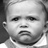

In [7]:
angry = list(data_path.glob('angry/*'))
PIL.Image.open(str(angry[1]))

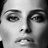

In [8]:
neutral = list(data_path.glob('neutral/*'))
PIL.Image.open(str(neutral[6]))

### Load Data

In [9]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=16)

Found 8960 files belonging to 2 classes.


2023-04-27 16:30:10.133945: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

In [12]:
batch[0].shape

(16, 256, 256, 3)

### Data Visualisation

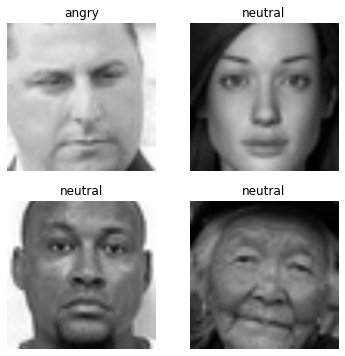

In [14]:
plt.figure(figsize=(6, 6))
for images, labels in data.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


### Scaling the data

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
batchh = data.as_numpy_iterator().next()

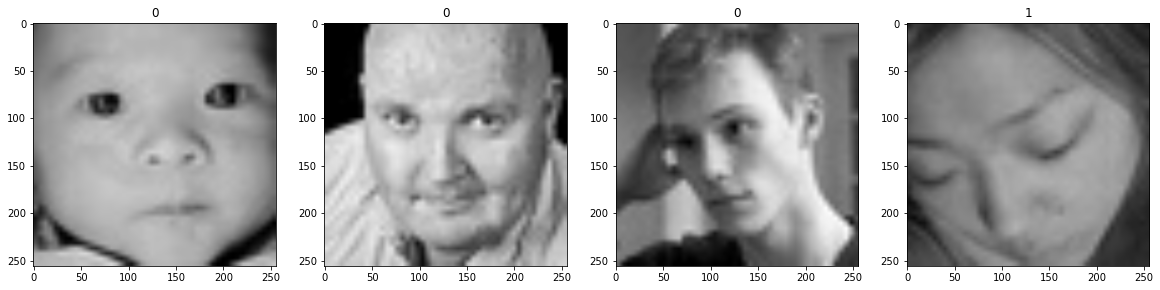

In [17]:
# Visualising the scaled data

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batchh[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    

### Splitting the data

In [18]:
# number of batches
len(data)

560

In [19]:
train_size = int(len(data)*.8) # 80% of data for training
val_size = int(len(data)*.2)+1 # 20% of data for validation

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

In [21]:
len(train)

448

In [22]:
len(val)

112

### Building the deep learning model

#### 2 Layers

In [23]:
mod_2 = Sequential()

mod_2.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_2.add(MaxPooling2D())

mod_2.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_2.add(MaxPooling2D())

mod_2.add(Flatten())

mod_2.add(Dense(256, activation='relu'))
mod_2.add(Dense(1, activation='sigmoid'))

In [24]:
mod_2.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
mod_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 256)               3

#### 3 Layers

In [26]:
mod_3 = Sequential()

mod_3.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_3.add(MaxPooling2D())

mod_3.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_3.add(MaxPooling2D())

mod_3.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_3.add(MaxPooling2D())

mod_3.add(Flatten())

mod_3.add(Dense(256, activation='relu'))
mod_3.add(Dense(1, activation='sigmoid'))

In [27]:
mod_3.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
mod_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 16)      

#### 4 Layers

In [29]:
mod_4 = Sequential()

mod_4.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_4.add(MaxPooling2D())

mod_4.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_4.add(MaxPooling2D())

mod_4.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_4.add(MaxPooling2D())

mod_4.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_4.add(MaxPooling2D())

mod_4.add(Flatten())

mod_4.add(Dense(256, activation='relu'))
mod_4.add(Dense(1, activation='sigmoid'))

In [30]:
mod_4.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
mod_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 32)      

#### 5 Layers

In [32]:
mod_5 = Sequential()

mod_5.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Flatten())

mod_5.add(Dense(256, activation='relu'))
mod_5.add(Dense(1, activation='sigmoid'))

In [33]:
mod_5.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [34]:
mod_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 32)      

#### Training the model

In [35]:
logdir='logs'

In [36]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [37]:
hist_2 = mod_2.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
448/448 [==============================] - 169s 376ms/step - loss: 0.7381 - accuracy: 0.6041 - val_loss: 0.6307 - val_accuracy: 0.6496
Epoch 2/20
448/448 [==============================] - 183s 409ms/step - loss: 0.6157 - accuracy: 0.6631 - val_loss: 0.6264 - val_accuracy: 0.6691
Epoch 3/20
448/448 [==============================] - 173s 386ms/step - loss: 0.5188 - accuracy: 0.7330 - val_loss: 0.6949 - val_accuracy: 0.6378
Epoch 4/20
448/448 [==============================] - 189s 421ms/step - loss: 0.3619 - accuracy: 0.8333 - val_loss: 0.8907 - val_accuracy: 0.6417
Epoch 5/20
448/448 [==============================] - 174s 388ms/step - loss: 0.2204 - accuracy: 0.9118 - val_loss: 0.9596 - val_accuracy: 0.6523
Epoch 6/20
448/448 [==============================] - 154s 345ms/step - loss: 0.1351 - accuracy: 0.9515 - val_loss: 1.0286 - val_accuracy: 0.6624
Epoch 7/20
448/448 [==============================] - 159s 355ms/step - loss: 0.0930 - accuracy: 0.9700 - val_loss: 1.1404 -

In [38]:
hist_3 = mod_3.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
448/448 [==============================] - 140s 309ms/step - loss: 0.6692 - accuracy: 0.5992 - val_loss: 0.6410 - val_accuracy: 0.6451
Epoch 2/20
448/448 [==============================] - 134s 298ms/step - loss: 0.6275 - accuracy: 0.6544 - val_loss: 0.6230 - val_accuracy: 0.6468
Epoch 3/20
448/448 [==============================] - 122s 273ms/step - loss: 0.5819 - accuracy: 0.6906 - val_loss: 0.6577 - val_accuracy: 0.6272
Epoch 4/20
448/448 [==============================] - 125s 278ms/step - loss: 0.4865 - accuracy: 0.7600 - val_loss: 0.6243 - val_accuracy: 0.6641
Epoch 5/20
448/448 [==============================] - 117s 262ms/step - loss: 0.3506 - accuracy: 0.8393 - val_loss: 0.6953 - val_accuracy: 0.6674
Epoch 6/20
448/448 [==============================] - 123s 274ms/step - loss: 0.2050 - accuracy: 0.9169 - val_loss: 0.8689 - val_accuracy: 0.6942
Epoch 7/20
448/448 [==============================] - 131s 292ms/step - loss: 0.1282 - accuracy: 0.9541 - val_loss: 1.5371 -

In [39]:
hist_4 = mod_4.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
448/448 [==============================] - 135s 299ms/step - loss: 0.6703 - accuracy: 0.5999 - val_loss: 0.6478 - val_accuracy: 0.6272
Epoch 2/20
448/448 [==============================] - 164s 366ms/step - loss: 0.6242 - accuracy: 0.6551 - val_loss: 0.6307 - val_accuracy: 0.6345
Epoch 3/20
448/448 [==============================] - 141s 314ms/step - loss: 0.5803 - accuracy: 0.6946 - val_loss: 0.6248 - val_accuracy: 0.6473
Epoch 4/20
448/448 [==============================] - 135s 301ms/step - loss: 0.5130 - accuracy: 0.7418 - val_loss: 0.6821 - val_accuracy: 0.6434
Epoch 5/20
448/448 [==============================] - 134s 298ms/step - loss: 0.4143 - accuracy: 0.8107 - val_loss: 0.6946 - val_accuracy: 0.6574
Epoch 6/20
448/448 [==============================] - 134s 298ms/step - loss: 0.2774 - accuracy: 0.8877 - val_loss: 0.6752 - val_accuracy: 0.6881
Epoch 7/20
448/448 [==============================] - 133s 297ms/step - loss: 0.1795 - accuracy: 0.9325 - val_loss: 1.2971 -

In [40]:
hist_5 = mod_5.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
448/448 [==============================] - 114s 252ms/step - loss: 0.6881 - accuracy: 0.5511 - val_loss: 0.6634 - val_accuracy: 0.6244
Epoch 2/20
448/448 [==============================] - 111s 249ms/step - loss: 0.6443 - accuracy: 0.6376 - val_loss: 0.6121 - val_accuracy: 0.6780
Epoch 3/20
448/448 [==============================] - 120s 267ms/step - loss: 0.6108 - accuracy: 0.6639 - val_loss: 0.5956 - val_accuracy: 0.6836
Epoch 4/20
448/448 [==============================] - 128s 285ms/step - loss: 0.5866 - accuracy: 0.6847 - val_loss: 0.6047 - val_accuracy: 0.6948
Epoch 5/20
448/448 [==============================] - 119s 265ms/step - loss: 0.5649 - accuracy: 0.7066 - val_loss: 0.5925 - val_accuracy: 0.6931
Epoch 6/20
448/448 [==============================] - 115s 256ms/step - loss: 0.5355 - accuracy: 0.7285 - val_loss: 0.6021 - val_accuracy: 0.7009
Epoch 7/20
448/448 [==============================] - 125s 278ms/step - loss: 0.4969 - accuracy: 0.7506 - val_loss: 0.6363 -

### Checking Model Performance

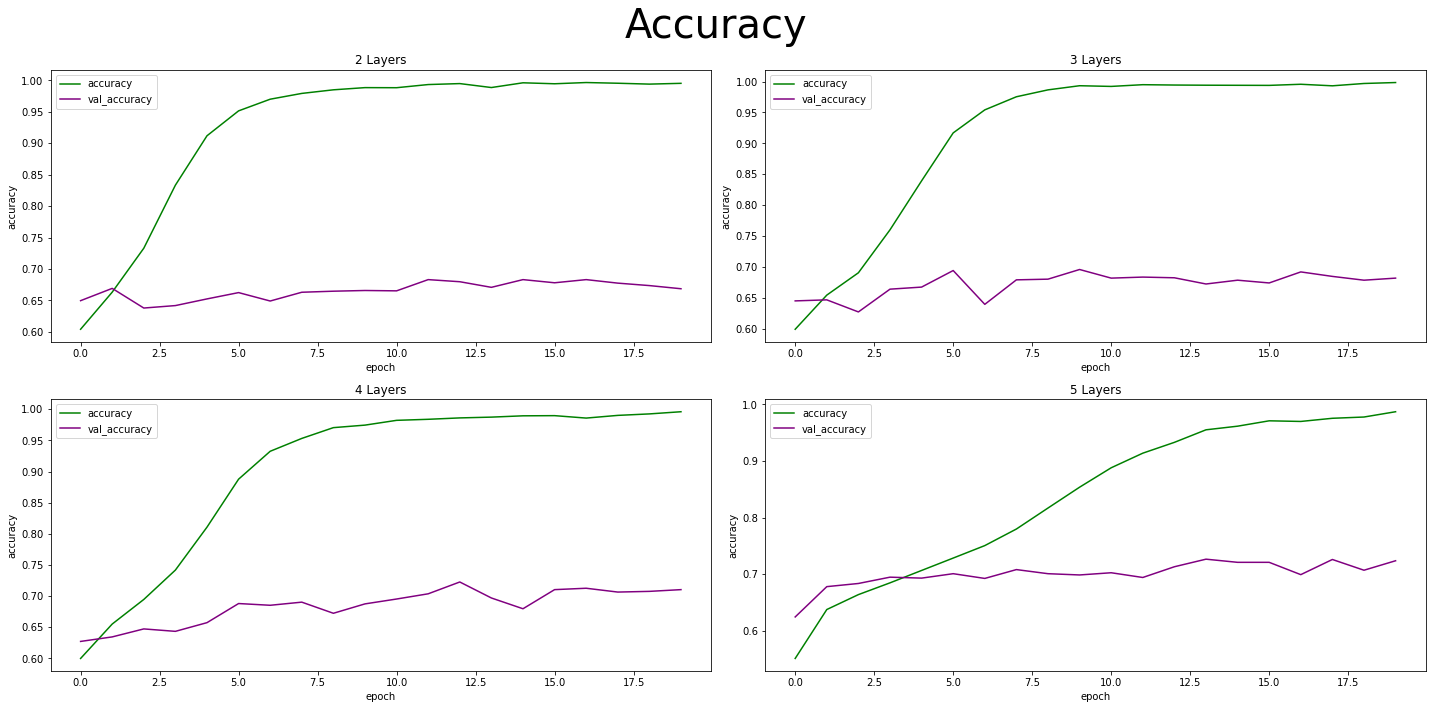

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Accuracy', fontsize=40)
axs[0, 0].plot(hist_2.history['accuracy'], color='green', label='accuracy')
axs[0, 0].plot(hist_2.history['val_accuracy'], color='purple', label='val_accuracy')
axs[0, 0].legend(loc="upper left")
axs[0, 0].set_title('2 Layers')
axs[0, 1].plot(hist_3.history['accuracy'], color='green', label='accuracy')
axs[0, 1].plot(hist_3.history['val_accuracy'], color='purple', label='val_accuracy')
axs[0, 1].legend(loc="upper left")
axs[0, 1].set_title('3 Layers')
axs[1, 0].plot(hist_4.history['accuracy'], color='green', label='accuracy')
axs[1, 0].plot(hist_4.history['val_accuracy'], color='purple', label='val_accuracy')
axs[1, 0].legend(loc="upper left")
axs[1, 0].set_title('4 Layers')
axs[1, 1].plot(hist_5.history['accuracy'], color='green', label='accuracy')
axs[1, 1].plot(hist_5.history['val_accuracy'], color='purple', label='val_accuracy')
axs[1, 1].legend(loc="upper left")
axs[1, 1].set_title('5 Layers')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='accuracy')


fig.tight_layout()


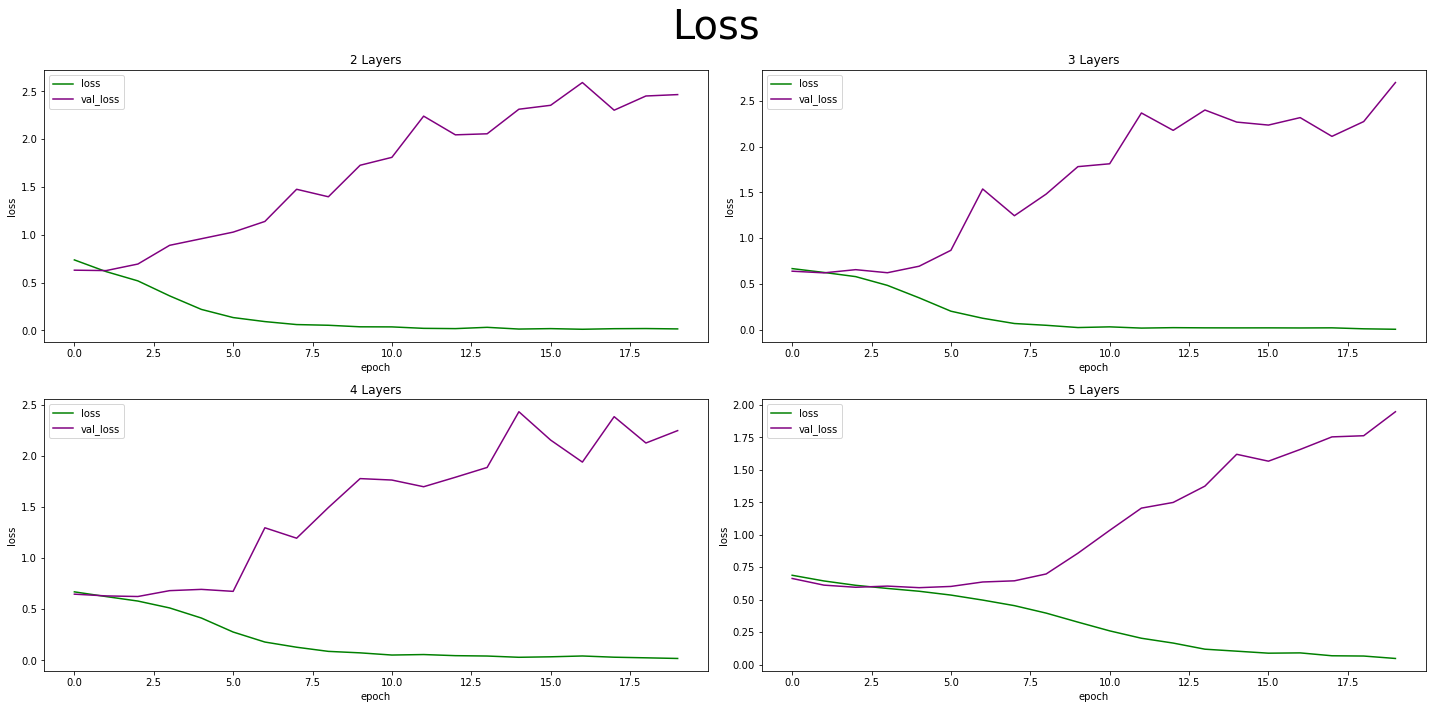

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Loss', fontsize=40)
axs[0, 0].plot(hist_2.history['loss'], color='green', label='loss')
axs[0, 0].plot(hist_2.history['val_loss'], color='purple', label='val_loss')
axs[0, 0].legend(loc="upper left")
axs[0, 0].set_title('2 Layers')
axs[0, 1].plot(hist_3.history['loss'], color='green', label='loss')
axs[0, 1].plot(hist_3.history['val_loss'], color='purple', label='val_loss')
axs[0, 1].legend(loc="upper left")
axs[0, 1].set_title('3 Layers')
axs[1, 0].plot(hist_4.history['loss'], color='green', label='loss')
axs[1, 0].plot(hist_4.history['val_loss'], color='purple', label='val_loss')
axs[1, 0].legend(loc="upper left")
axs[1, 0].set_title('4 Layers')
axs[1, 1].plot(hist_5.history['loss'], color='green', label='loss')
axs[1, 1].plot(hist_5.history['val_loss'], color='purple', label='val_loss')
axs[1, 1].legend(loc="upper left")
axs[1, 1].set_title('5 Layers')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')


fig.tight_layout()

### Creating another model using Softmax activation

In [43]:
mod_smx = Sequential()

mod_smx.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_smx.add(MaxPooling2D())

mod_smx.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_smx.add(MaxPooling2D())

mod_smx.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_smx.add(MaxPooling2D())

mod_smx.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_smx.add(MaxPooling2D())

mod_smx.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_smx.add(MaxPooling2D())

mod_smx.add(Flatten())

mod_smx.add(Dense(256, activation='relu'))
mod_smx.add(Dense(1, activation='softmax'))

In [44]:
mod_smx.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [45]:
mod_smx.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 30, 30, 32)      

### Another model using SVM

In [46]:
mod_svm = Sequential()

mod_svm.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_svm.add(MaxPooling2D())

mod_svm.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_svm.add(MaxPooling2D())

mod_svm.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_svm.add(MaxPooling2D())

mod_svm.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_svm.add(MaxPooling2D())

mod_svm.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_svm.add(MaxPooling2D())

mod_svm.add(Flatten())

mod_svm.add(Dense(256, activation='relu'))
mod_svm.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation ='linear'))

In [47]:
mod_svm.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [48]:
mod_svm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 30, 30, 32)      

#### Training the new models

In [49]:
hist_smx = mod_smx.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
448/448 [==============================] - 136s 301ms/step - loss: 0.6633 - accuracy: 0.5505 - val_loss: 0.6427 - val_accuracy: 0.5692
Epoch 2/20
448/448 [==============================] - 131s 292ms/step - loss: 0.6193 - accuracy: 0.5497 - val_loss: 0.6117 - val_accuracy: 0.5681
Epoch 3/20
448/448 [==============================] - 130s 290ms/step - loss: 0.5759 - accuracy: 0.5494 - val_loss: 0.5823 - val_accuracy: 0.5703
Epoch 4/20
448/448 [==============================] - 130s 290ms/step - loss: 0.5384 - accuracy: 0.5512 - val_loss: 0.5432 - val_accuracy: 0.5675
Epoch 5/20
448/448 [==============================] - 130s 291ms/step - loss: 0.4997 - accuracy: 0.5509 - val_loss: 0.5273 - val_accuracy: 0.5675
Epoch 6/20
448/448 [==============================] - 125s 279ms/step - loss: 0.4647 - accuracy: 0.5495 - val_loss: 0.5213 - val_accuracy: 0.5664
Epoch 7/20
448/448 [==============================] - 125s 280ms/step - loss: 0.4154 - accuracy: 0.5494 - val_loss: 0.5359 -

In [50]:
hist_svm = mod_svm.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
448/448 [==============================] - 125s 278ms/step - loss: 0.9499 - accuracy: 0.5068 - val_loss: 0.8625 - val_accuracy: 0.5765
Epoch 2/20
448/448 [==============================] - 125s 279ms/step - loss: 0.9093 - accuracy: 0.5502 - val_loss: 0.8653 - val_accuracy: 0.5720
Epoch 3/20
448/448 [==============================] - 131s 292ms/step - loss: 0.9074 - accuracy: 0.5502 - val_loss: 0.8731 - val_accuracy: 0.5681
Epoch 4/20
448/448 [==============================] - 127s 284ms/step - loss: 0.9051 - accuracy: 0.5509 - val_loss: 0.8708 - val_accuracy: 0.5681
Epoch 5/20
448/448 [==============================] - 128s 285ms/step - loss: 0.9050 - accuracy: 0.5508 - val_loss: 0.8681 - val_accuracy: 0.5714
Epoch 6/20
448/448 [==============================] - 139s 310ms/step - loss: 0.9046 - accuracy: 0.5505 - val_loss: 0.8669 - val_accuracy: 0.5686
Epoch 7/20
448/448 [==============================] - 143s 320ms/step - loss: 0.9042 - accuracy: 0.5504 - val_loss: 0.8666 -

### Visualising Model Performance

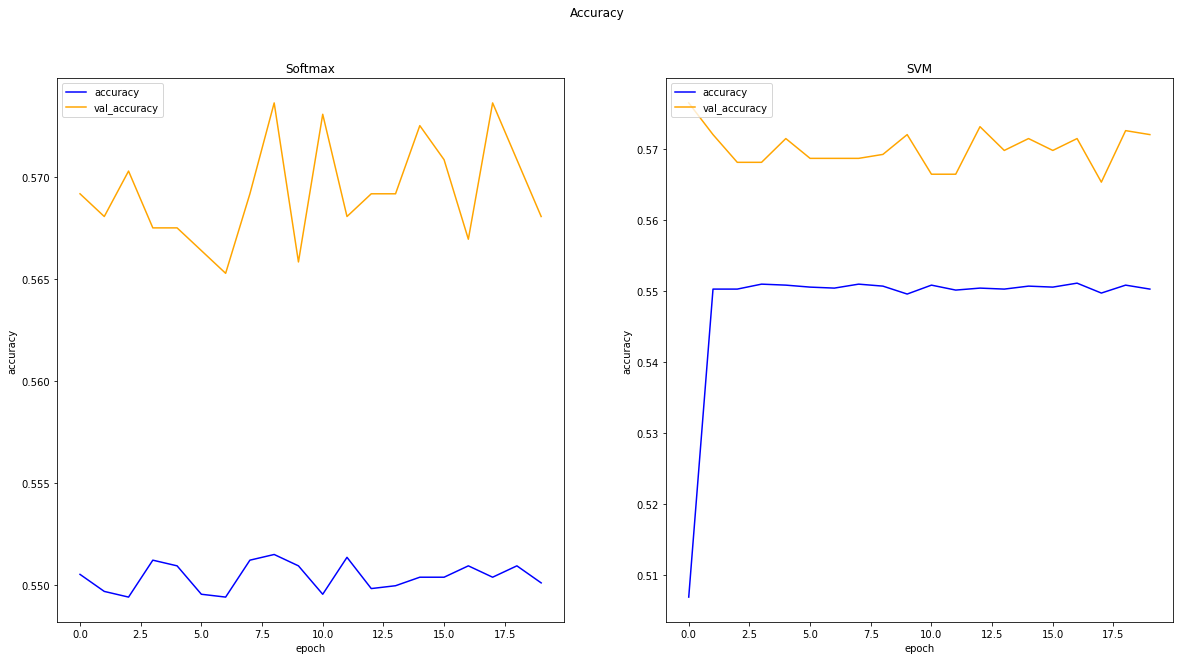

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Accuracy')
axs[0].plot(hist_smx.history['accuracy'], color='blue', label='accuracy')
axs[0].plot(hist_smx.history['val_accuracy'], color='orange', label='val_accuracy')
axs[0].legend(loc="upper left")
axs[0].set_title('Softmax')
axs[1].plot(hist_svm.history['accuracy'], color='blue', label='accuracy')
axs[1].plot(hist_svm.history['val_accuracy'], color='orange', label='val_accuracy')
axs[1].legend(loc="upper left")
axs[1].set_title('SVM')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='accuracy')


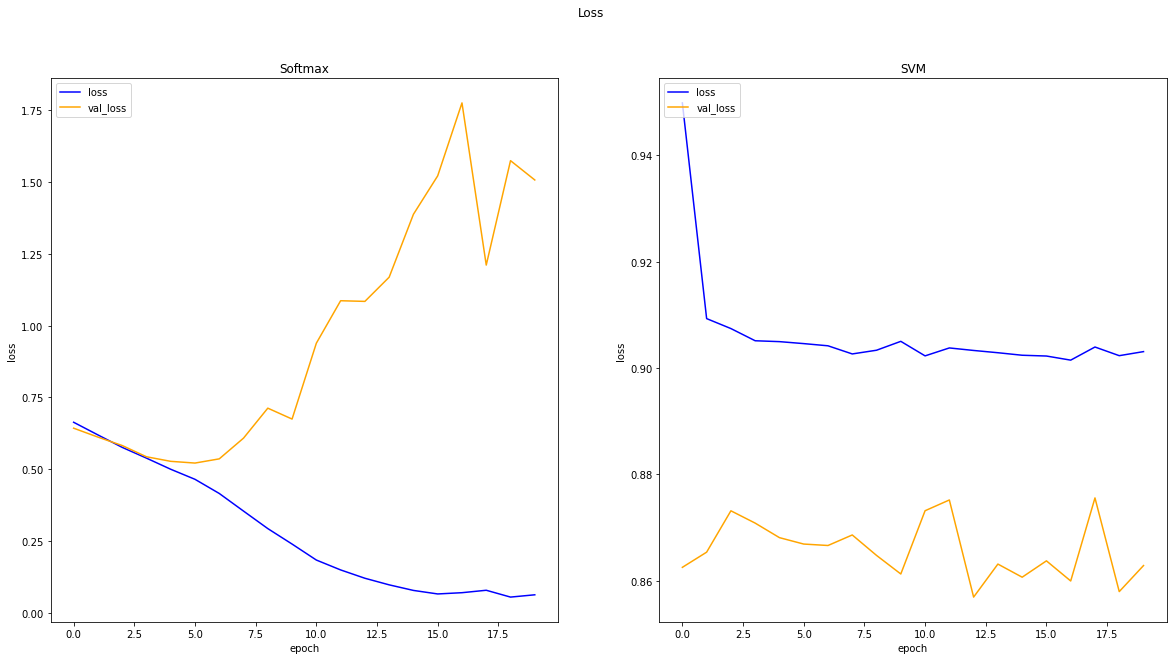

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Loss')
axs[0].plot(hist_smx.history['loss'], color='blue', label='loss')
axs[0].plot(hist_smx.history['val_loss'], color='orange', label='val_loss')
axs[0].legend(loc="upper left")
axs[0].set_title('Softmax')
axs[1].plot(hist_svm.history['loss'], color='blue', label='loss')
axs[1].plot(hist_svm.history['val_loss'], color='orange', label='val_loss')
axs[1].legend(loc="upper left")
axs[1].set_title('SVM')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')


### Augmenting the data

### Adding a dropout layer

In [67]:
mod_5d = Sequential()

mod_5d.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Dropout(0.2))

mod_5d.add(Flatten())

mod_5d.add(Dense(256, activation='relu'))
mod_5d.add(Dense(1, activation='sigmoid'))

In [68]:
mod_5d.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [69]:
mod_5d.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 30, 30, 32)     

In [70]:
hist_5d = mod_5d.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
448/448 [==============================] - 124s 274ms/step - loss: 0.6686 - accuracy: 0.5910 - val_loss: 0.6310 - val_accuracy: 0.6507
Epoch 2/20
448/448 [==============================] - 132s 295ms/step - loss: 0.6274 - accuracy: 0.6483 - val_loss: 0.6032 - val_accuracy: 0.6741
Epoch 3/20
448/448 [==============================] - 135s 302ms/step - loss: 0.5948 - accuracy: 0.6759 - val_loss: 0.6164 - val_accuracy: 0.6853
Epoch 4/20
448/448 [==============================] - 132s 294ms/step - loss: 0.5775 - accuracy: 0.6974 - val_loss: 0.5750 - val_accuracy: 0.6975
Epoch 5/20
448/448 [==============================] - 128s 286ms/step - loss: 0.5546 - accuracy: 0.7115 - val_loss: 0.5780 - val_accuracy: 0.7015
Epoch 6/20
448/448 [==============================] - 149s 332ms/step - loss: 0.5226 - accuracy: 0.7359 - val_loss: 0.5438 - val_accuracy: 0.7210
Epoch 7/20
448/448 [==============================] - 145s 323ms/step - loss: 0.5010 - accuracy: 0.7528 - val_loss: 0.5905 -

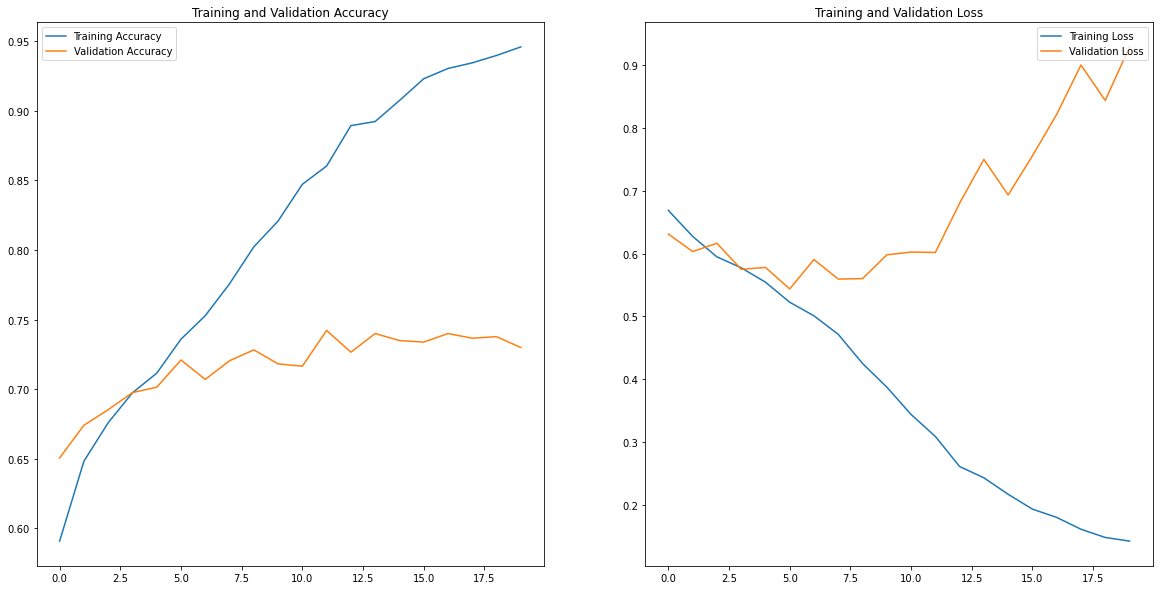

In [71]:
acc = hist_5d.history['accuracy']
val_acc = hist_5d.history['val_accuracy']

loss = hist_5d.history['loss']
val_loss = hist_5d.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


### Saving the trained models

In [440]:
mod_2.save('angry_model2.h5')
mod_3.save('angry_model3.h5')
mod_4.save('angry_model4.h5')
mod_5.save('angry_model5.h5')
mod_smx.save('angry_modelsmx.h5')
mod_svm.save('angry_modelsvm.h5')
mod_5d.save('angry_model5d.h5')

### Evaluating the model

In [143]:
import pandas as pd

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [73]:
test_dir = 'data/test'

In [261]:
test = tf.keras.utils.image_dataset_from_directory(test_dir, batch_size=548)

Found 2191 files belonging to 2 classes.


In [262]:
test_iterator = test.as_numpy_iterator()

In [263]:
test_batch = test_iterator.next()

In [286]:
len(test)

4

In [284]:
test_batch[0].shape

(547, 256, 256, 3)

In [266]:
pre = Precision()
re = Recall()
biacc = BinaryAccuracy()

In [267]:
for test_batch in test.as_numpy_iterator(): 
    X, y = test_batch
    yhat = mod_5d.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    biacc.update_state(y, yhat)

In [268]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{biacc.result().numpy()}')

Precision: 0.6974323391914368, Recall:0.8150851726531982, Accuracy:0.6969643831253052


In [269]:
yhat

array([[1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.17405415e-01],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [9.99946594e-01],


In [270]:
yhat.shape

(547, 1)

In [271]:
y

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,

In [272]:
y.shape

(547,)

In [442]:
thresh = 0.5

yhat_binary = np.where(yhat > thresh, 1, 0)

In [443]:
yhat_binary

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [451]:
yy = yhat_binary.reshape(547)
yy.shape

(547,)

In [445]:
yy

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [446]:
df = pandas.DataFrame({"True": y, "Pred": yy})
print(df)

     True  Pred
0       1     1
1       0     0
2       1     1
3       0     1
4       1     1
..    ...   ...
542     1     1
543     1     1
544     1     1
545     1     1
546     0     0

[547 rows x 2 columns]


In [447]:
cm = confusion_matrix(y, yy)

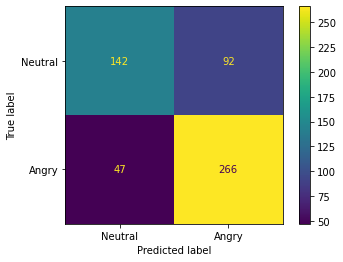

In [448]:
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Neutral', 'Angry'])

cm_display.plot()
plt.show()

In [449]:
from sklearn.metrics import roc_curve, auc

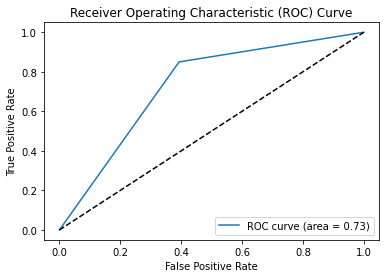

In [450]:
fpr, tpr, thresholds = roc_curve(y, yy)

# Computing the AUC score
roc_auc = auc(fpr, tpr)

#Plotting the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Image Prediction

In [437]:
from tensorflow.keras.preprocessing import image

#### Testing an angry image

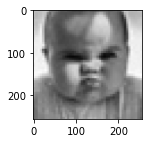

In [382]:
test_image = image.load_img('data/test/angry/PrivateTest_73130508.jpg', target_size = (256,256))
plt.figure(figsize=(2, 2))
plt.imshow(test_image);

In [383]:
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = mod_5d.predict(test_image)
result

array([[0.99970675]], dtype=float32)

In [432]:
rr = result.reshape(1)
ang_conf = round(rr[0] * 100, 2)
neut_conf = round(100-(rr[0] * 100), 2)

print(f'Emotion prediction\n\nAnger: {ang_conf}%\nNeutral: {neut_conf}%')

Emotion prediction

Anger: 99.97%
Neutral: 0.03%


In [436]:
if result > 0.5: 
    print(f'Predicted emotion is Angry')
else:
    print(f'Predicted emotion is Neutral')

Predicted emotion is Angry


#### Testing a neutral image

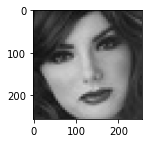

In [318]:
test_image2 = image.load_img('data/test/neutral/PublicTest_64004024.jpg', target_size = (256,256))
plt.figure(figsize=(2, 2))
plt.imshow(test_image2);

In [319]:
test_image2 = image.img_to_array(test_image2)
test_image2 = test_image2/255
test_image2 = np.expand_dims(test_image2, axis = 0)
result2 = mod_5d.predict(test_image2)
result2

array([[0.49676117]], dtype=float32)

In [433]:
rr2 = result2.reshape(1)
ang_conf2 = round(rr2[0] * 100, 2)
neut_conf2 = round(100-(rr2[0] * 100), 2)

print(f'Emotion prediction\n\nAnger: {ang_conf2}%\nNeutral: {neut_conf2}%')

Emotion prediction

Anger: 49.68%
Neutral: 50.32%


In [434]:
if result2 > 0.5: 
    print(f'Predicted emotion is Angry')
else:
    print(f'Predicted emotion is Neutral')

Predicted emotion is Neutral


## Conclusion

In conclusion, this image classifier is performing relatively well. Although the datasets used to train the deep learning models were not equal in size, the difference between them was marginal and did not have a negative effect on the performance. A dropout layer was added to improve the model but there was not much of an improvement when compared to the model without the dropout layer. Regardless, the classifier was able to achieve an above average accuracy score and make correct predictions on the test images.